In [14]:
import pandas as pd
df=pd.read_csv('train_csv.csv')
df.head()
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
df.head()

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70


In [2]:
z=pd.to_datetime(df['time']) 

In [3]:
z.dt.second 

0      0
1     10
2     20
3     30
4     40
      ..
75    30
76    40
77    50
78     0
79    10
Name: time, Length: 80, dtype: int64

In [6]:
df['year']=z.dt.year
df['month']=z.dt.month
df['day']=z.dt.day
df['hour']=z.dt.hour
df['minute']=z.dt.minute
df['second']=z.dt.second

In [7]:
df.drop(columns=['time'],inplace=True)
df.head()

,id,feature,year,month,day,hour,minute,second
0,0,237.97,2019,3,19,0,0,0
1,1,57.93,2019,3,19,0,0,10
2,2,90.53,2019,3,19,0,0,20
3,3,260.75,2019,3,19,0,0,30
4,4,49.70,2019,3,19,0,0,40


In [8]:
x=df.drop(columns=['feature'])
y=df['feature']
print(x.shape)

(80, 7)


In [35]:
model=RandomForestRegressor()
model.fit(x,y)
y_predict = model.predict(x)
acc=r2_score(y,y_predict)
acc

C:\Users\ujjal\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8469556906274606

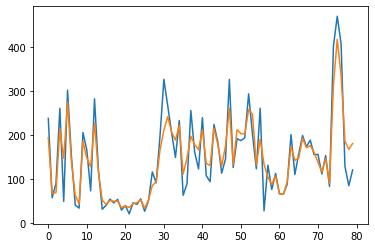

In [36]:
import matplotlib.pyplot as plt
l=list(range(len(df)))
#df = df.sort_values('time', ascending=True)
plt.plot(l, df['feature'])
plt.plot(l, y_predict)

In [37]:
test=pd.read_csv('test_csv.csv')
z=pd.to_datetime(test['time']) 
test['year']=z.dt.year
test['month']=z.dt.month
test['day']=z.dt.day
test['hour']=z.dt.hour
test['minute']=z.dt.minute
test['second']=z.dt.second
test.drop(columns=['time'],inplace=True)
y_pred=model.predict(test)

In [38]:
y_pred

array([244.633, 279.493, 239.655, 184.079, 181.206, 181.206, 244.633,
       279.493, 239.655, 184.079, 181.206, 181.206, 244.633, 279.493,
       239.655, 184.079, 181.206, 181.206, 244.633, 279.493, 239.655,
       184.079, 181.206, 181.206, 244.633, 279.493, 239.655, 184.079,
       181.206, 181.206, 244.633, 279.493, 239.655, 184.079, 181.206,
       181.206, 244.633, 279.493, 239.655, 184.079])